<a href="https://colab.research.google.com/github/jcmacuacua/Dados_Hyperspetral/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_Jaime_cnn_nova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adaptado de:

https://medium.com/techiepedia/binary-image-classifier-cnn-using-tensorflow-a3f5d6746697

Primeiro vamos montar o Google Drive no Google Colab, isso permite-nos baixar o conjunto de dados diretamente para o Google Drive por meio do Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Agora vamos importar as bibliotecas/módulos. Neste caso os mais importantes são: Numpy; Tensorflow e Keras; os, cv2 e matplotlib. Ainda configuramos o GPU para ter mais memória para faciltar o processamento de dados.

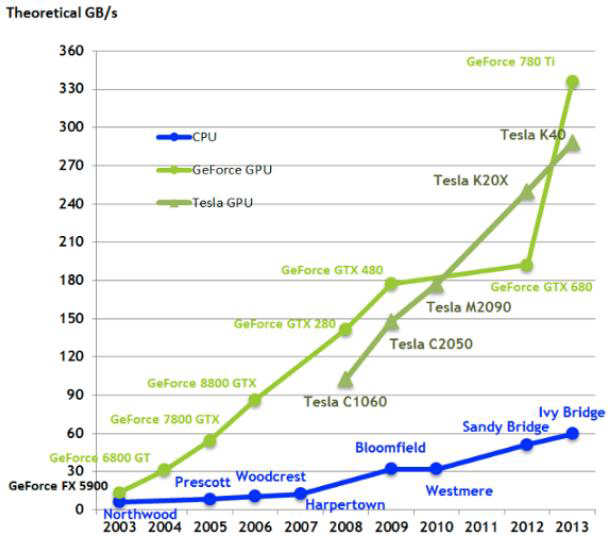


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from random import randint
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Num GPUs Available:  1


Aqui criamos os seguintes objetos para nossa análise. Assim, temos dois grupos de dados, de treino e de teste armazenados na nossa pasta no Google Drive. 

In [ ]:
train_path = "/content/drive/MyDrive/Leaf/train"
test_path = "/content/drive/MyDrive/Leaf/test"

dest_res = 150

batchsize = 32

label1 = 'healthy'
label2 = 'diseased'

In [ ]:
print(os.listdir(train_path))
print(os.listdir(test_path))

['diseased', 'healthy']
['diseased', 'healthy']


In [ ]:
print(os.listdir(train_path))
print(os.listdir(test_path))
import shutil
undesired_folder = '.ipynb_checkpoints'
for paths in (train_path,test_path):
    if undesired_folder in os.listdir(paths):
       shutil.rmtree(os.path.join(paths,undesired_folder))

print(os.listdir(train_path))
print(os.listdir(test_path))

['diseased', 'healthy']
['diseased', 'healthy']
['diseased', 'healthy']
['diseased', 'healthy']


- O Keras ImageDataGenerator facilita rotular e carregar os grandes conjuntos de dados de imagem.

- Aqui criamos dois objetos para ImageDataGenerator e também redimensionamos a imagem de forma que seus valores de pixel sejam normalizados entre 0 e 1 sem afetar a qualidade da imagem, o que facilitará a treinamos a CNN. 

- Usamos esses objetos para chamar o método de fluxo do diretório especificando nosso caminho para o diretório Train and Test;

- Redimensionamos as imagens (150x150) - é importante porque as imagens do mundo real podem ter tamanhos diferentes;

- Ainda especificamos o tamanho do lote, o que significa simplesmente o número de amostras que serão propagadas pela rede em um determinado tempo, 32 é o valor padrão para essa função. 

- Então aqui nosso resultado de classificação se enquadra em uma das duas classes ou seja, folha doente ou folha saudável, portanto, especificamos class_mode como binário.

**Nota:** A normalização dos dados é uma etapa importante que garante que cada parâmetro de entrada (pixel, neste caso) tenha uma distribuição de dados semelhante. Isso torna a convergência mais rápida durante o treinamento da rede.

In [ ]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(train_path,
                                          target_size=(dest_res,dest_res),
                                          batch_size = batchsize,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory(test_path,
                                          target_size=(dest_res,dest_res),
                                          batch_size = batchsize,
                                          class_mode = 'binary')

Found 1967 images belonging to 2 classes.
Found 512 images belonging to 2 classes.


Aqui pode verificar seus rótulos de classe codificados executando o código abaixo.

In [ ]:
test_dataset.class_indices

{'diseased': 0, 'healthy': 1}

**Vamos definir o nosso modelo Convolutional Neural Network-CNN**
- CNN é uma classe de rede neural profunda usada principalmente no campo da visão computacional e da imagem - proposta pelo pesquisador francês Yann LeCun (LECUN, et al., 1989);

- Os principais componentes da arquitetura CNN são:Imagem de entrada; Camada convolucional; Camada de pooling e;Flatterning.
**Imagem de entrada**
- Cada imagem é convertida em uma matriz matemática de zeros e uns;

**Camada convolucional**
- É local onde começa o processamento da imagem;
- Detector de características ou filtro: é uma matriz ou padrão que você coloca em uma imagem para transformá-la em um mapa de características;
- Filtros percorrem os dados de entrada em largura, altura e profundidade;
- Quanto mais filtros convolucionais, mais features são extraídas, mas isso tem custo, de memória e processamento;

**Camada de pooling**
- A camada de pooling nos ajuda a ignorar os dados menos importantes na imagem e reduz a imagem ainda mais, preservando suas características importantes.
- Possibilita a rede aprender diversas representações dos dados – evitando overfitting;
- Executar o pooling utilizando a técnica maxpooling;
- A técnica de pooling também beneficia regularização da rede, reduzindo o custo de memória e processamento.

**Flatterning**
- A imagem agrupada é achatada e convertida em uma coluna única. Cada linha é transformada em uma coluna e empilhada uma sobre a outra.
- Por exemplo, convertemos uma matriz 3x3 em uma matriz 1xn, onde n, em nosso caso, é 9.

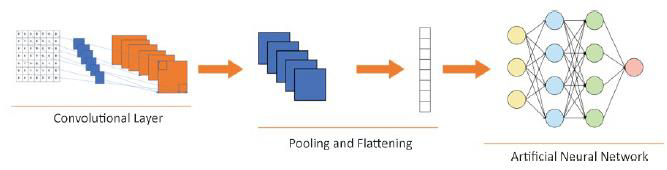

In [ ]:
model = keras.Sequential()

# Camada convolucional e camada maxpool 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(dest_res,dest_res,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Camada convolucional e camada maxpool 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Camada convolucional e camada maxpool 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Camada convolucional e camada maxpool 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Esta camada nivela a matriz de imagens resultante para uma matriz 1D
model.add(keras.layers.Flatten())

# Camada oculta com 512 neurônios e função de ativação da Unidade Linear Retificada
model.add(keras.layers.Dense(512,activation='relu'))

# Camada de saída com um único neurônio que dá 0 para folha doente ou 1 para folha saudável
#Aqui usamos a função de ativação sigmoid que faz com que a saída do nosso modelo fique entre 0 e 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#steps_per_epoch = train_imagesize/batch_size
history = model.fit(train_dataset,
         steps_per_epoch = 50,
         epochs = 40,
         validation_data = test_dataset
         )

Epoch 1/40
50/50 [==============================] - 364s 7s/step - loss: 0.4865 - accuracy: 0.7500 - val_loss: 0.3033 - val_accuracy: 0.8398
Epoch 2/40
50/50 [==============================] - 55s 1s/step - loss: 0.2300 - accuracy: 0.9084 - val_loss: 0.0760 - val_accuracy: 0.9785
Epoch 3/40
50/50 [==============================] - 20s 400ms/step - loss: 0.4235 - accuracy: 0.8730 - val_loss: 0.2075 - val_accuracy: 0.9062
Epoch 4/40
50/50 [==============================] - 14s 274ms/step - loss: 0.1842 - accuracy: 0.9343 - val_loss: 0.1141 - val_accuracy: 0.9512
Epoch 5/40
50/50 [==============================] - 15s 291ms/step - loss: 0.1407 - accuracy: 0.9463 - val_loss: 0.0865 - val_accuracy: 0.9746
Epoch 6/40
50/50 [==============================] - 14s 279ms/step - loss: 0.1079 - accuracy: 0.9627 - val_loss: 0.1538 - val_accuracy: 0.9414
Epoch 7/40
50/50 [==============================] - 14s 274ms/step - loss: 0.0720 - accuracy: 0.9722 - val_loss: 0.0615 - val_accuracy: 0.9844
Epoc

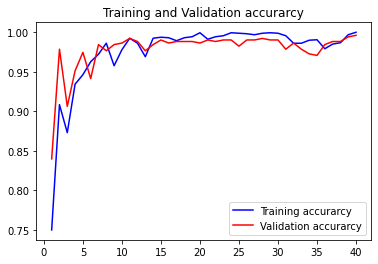

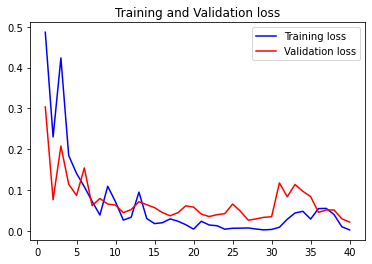

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


In [ ]:
history.history

{'accuracy': [0.75,
  0.9084017872810364,
  0.8730258941650391,
  0.9343019723892212,
  0.9463045001029968,
  0.9627289772033691,
  0.9722046852111816,
  0.9861023426055908,
  0.9576752781867981,
  0.9778900742530823,
  0.9924194812774658,
  0.9861023426055908,
  0.9690461158752441,
  0.9924194812774658,
  0.993682861328125,
  0.9930511713027954,
  0.9892609119415283,
  0.9930511713027954,
  0.9943146109580994,
  0.9993683099746704,
  0.9911560416221619,
  0.9943146109580994,
  0.9955779910087585,
  0.9993683099746704,
  0.998736560344696,
  0.9981048703193665,
  0.9968414306640625,
  0.998736560344696,
  0.9993683099746704,
  0.9987499713897705,
  0.9955779910087585,
  0.9861023426055908,
  0.9861023426055908,
  0.9898926019668579,
  0.9905242919921875,
  0.9791535139083862,
  0.9850000143051147,
  0.9867340326309204,
  0.9968414306640625,
  1.0],
 'loss': [0.48653167486190796,
  0.2299564927816391,
  0.4235054552555084,
  0.18416409194469452,
  0.1406753957271576,
  0.107899479568004

In [ ]:
def predictImage(filename,c1_name,c2_name):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)[0][0]
    print('pred_val: ',val)
    val = round(val)
    print('rounded: ',val)
    if val == 1:
        
        plt.xlabel(c1_name,fontsize=12)
        
    
    elif val == 0:
        
        plt.xlabel(c2_name,fontsize=12)


pred_val:  0.0
rounded:  0


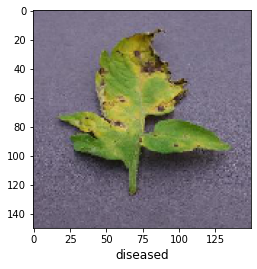

In [ ]:
subdirs = os.listdir(test_path)

random_folder = subdirs[randint(0,1)]

folder_path = os.path.join(test_path,random_folder)

images = os.listdir(folder_path)

random_image_path = os.path.join(folder_path,images[randint(0,len(images)-1)])

predictImage(random_image_path,label1,label2)


In [ ]:
os.listdir(folder_path)

['00f16858-f392-4d9e-ad9f-efab8049a13f___JR_Sept.L.S 8368.JPG',
 '0a70601b-8511-4a56-9562-c95c46372874___Matt.S_CG 1032.JPG',
 '0a5edec2-e297-4a25-86fc-78f03772c100___JR_Sept.L.S 8468.JPG',
 '0a76257e-6a78-459b-8f51-a266805121eb___Matt.S_CG 2527.JPG',
 '0b23b869-cfa6-40d7-a683-f4637d91ebff___Matt.S_CG 1286.JPG',
 '0a146952-538a-41e5-a422-b5d50e91771e___Matt.S_CG 6079.JPG',
 '0aa486df-97b6-4764-89a9-d193e16aabbb___Keller.St_CG 1931.JPG',
 '0af9f990-ad92-4411-8623-4498ca4805ce___Keller.St_CG 1942.JPG',
 '0c1aa7e5-a820-4fb8-8bc2-623a6056e749___JR_Sept.L.S 2659.JPG',
 '0c48052c-232b-4ea7-b77d-322f5f642612___Matt.S_CG 7724.JPG',
 '0bbf4db7-38a1-4d5c-8fd7-503e9f37ef8f___Matt.S_CG 7848.JPG',
 '0b6a9374-858d-49ce-8a94-ab57c957718c___Matt.S_CG 2488.JPG',
 '0b4886e5-a065-44c1-aa19-bd166922d3de___JR_Sept.L.S 8498.JPG',
 '0bcb24a9-bf45-4008-b9df-1c729f977b17___Matt.S_CG 7835.JPG',
 '0c4935b6-8f13-4148-b5e6-19404d49fc78___Matt.S_CG 2733.JPG',
 '0ca7ed02-4540-47df-b01d-194b23226a2d___Matt.S_CG 1733.

In [ ]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
Y_pred = model.predict(train_dataset, test_dataset)
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(train_dataset.classes, y_pred))

print('Classification Report')
target_names = ['diseased', 'healthy']
print(classification_report(train_dataset.classes, y_pred, target_names=target_names))

Confusion Matrix
[[1118    0]
 [ 849    0]]
Classification Report
              precision    recall  f1-score   support

    diseased       0.57      1.00      0.72      1118
     healthy       0.00      0.00      0.00       849

    accuracy                           0.57      1967
   macro avg       0.28      0.50      0.36      1967
weighted avg       0.32      0.57      0.41      1967



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

X_train_dataset, X_test_dataset, y_test 